## Самостоятельная работа 3. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'1.4.4'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
df = pd.read_csv('./adult.csv') # можно загрузить из файла или URL
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


> По какой-то причине вместе пропущенных значений стоит знак вопроса...
>
> Заменим на `None`, чтобы было комфортно с этим работать 

In [3]:
df = df.applymap(lambda el: None if el == '?' else el)

1) Выведите последние 10 элеметнов датасета

In [4]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,None,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [5]:
df.shape

(32561, 15)

> 15 колонок и 32561 строк

3) Какие типы данных у элементов этого датасета?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


> У части признаков тип целочисленный тип `int64`, а у другой части тип `object`, в данном случае там находятся строки

4) Какие признаки имеют пропуски?

> Пропуски в следующих колонках:
- `workclass`
- `occupation`
- `native.country`

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

> Ваш ответ: иногда люди не хотят сообщать о своей занятости, а также о стране происхождения

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [7]:
print(f"Всего {df['workclass'].nunique()} уникальных `workclass`, если не считать пропуски отдельным классом"
      f"\nА сами классы: {[el for el in df['workclass'].unique() if el != None]}")

Всего 8 уникальных `workclass`, если не считать пропуски отдельным классом
А сами классы: ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked']


7) Какой средний возраст женщин и мужчин?

In [8]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

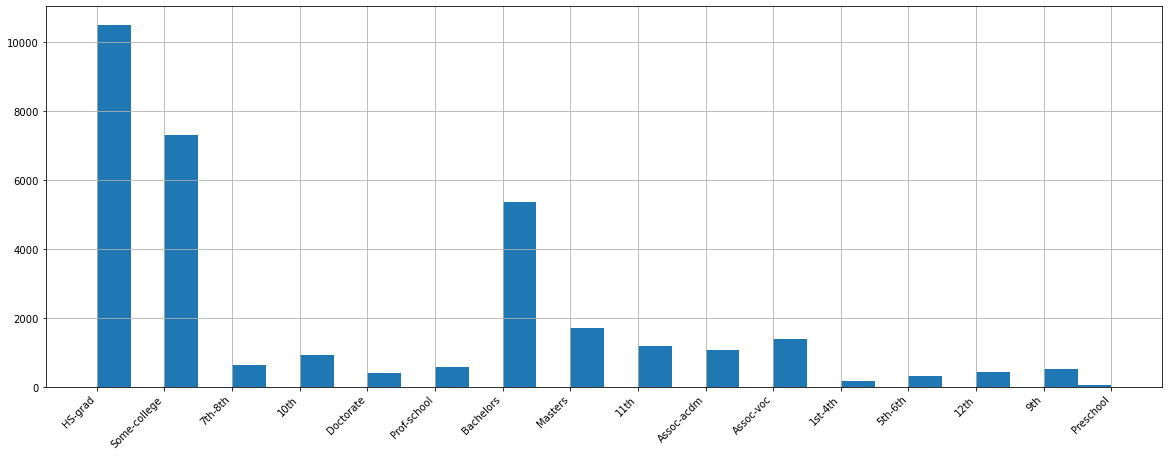

In [9]:
plt.figure(figsize=(20, 7))
df['education'].hist(bins=30)
plt.xticks(rotation=45, ha='right')
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [10]:
df.groupby('income')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [11]:
higher_educations = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

print(df[df['income'] == '>50K']['education'].isin(higher_educations).all())
print(f"Всего {(~df[df['income'] == '>50K']['education'].isin(higher_educations)).sum()} людей без высшего образования")
print(f"Что составляет {np.round((~df[df['income'] == '>50K']['education'].isin(higher_educations)).sum() / len(df[df['income'] == '>50K']) * 100, 1)} % всех людей с зп выше 50к")
# и таких достаточно много: 3306 из 7841

False
Всего 3306 людей без высшего образования
Что составляет 42.2 % всех людей с зп выше 50к


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [12]:
df['Is_married'] = df['marital.status'].apply(lambda x: True if x in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'] else False)

In [13]:
df[df['sex'] == 'Male'].groupby(['Is_married', 'income']).size()

Is_married  income
False       <=50K     7552
            >50K       697
True        <=50K     7576
            >50K      5965
dtype: int64

> Почти в 10 раз больше богатых среди женатых

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [14]:
df.groupby('income')['hours.per.week'].mean()

income
<=50K    38.840210
>50K     45.473026
Name: hours.per.week, dtype: float64

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

Сделаем следующую категоризацию для фичи `delta_capital`:

- Если `delta_capital` = 0, то присвоим значение `no_passive_income`
- Если `delta_capital` > 0, то используем следующую функцию: 
$$
\begin{equation}
f(\Delta_i, \Delta_{max}) = 
    \begin{cases}
        \text{low passive income} & \text{if } \frac{\Delta_i}{\Delta_{max}}  \le \frac{1}{3} \\
        \text{medium passive income} & \text{if } \frac{1}{3} \lt \frac{\Delta_i}{\Delta_{max}} \le  \frac{2}{3} \\
        \text{high passive income} & \text{if } \frac{\Delta_i}{\Delta_{max}} \ge \frac{2}{3}
    \end{cases}
\end{equation}
$$
- Если `delta_capital` < 0, то присвоим значение `passive_losses` (Можно конечно по аналогии с предыдущим разбить, но смысла в этом особо не вижу)


In [15]:
df['delta_capital'] = df['capital.gain'] - df['capital.loss']

def delta_to_cat(delta_capital_i, delta_capital_max):
    if delta_capital_i == 0:
        return 'no passive income'
    if delta_capital_i < 0:
        return 'passive losses'  
    
    def categorize_positive_capital(delta_i, delta_max):
        income_coef = delta_i / delta_max
        if income_coef <= 1/3:
            return 'low passive income'
        if income_coef > 1/3 and income_coef <= 2/3:
            return 'medium passive income'
        return 'high passive income'
    
    return categorize_positive_capital(delta_capital_i, delta_capital_max)

In [16]:
df['delta_cat'] = df['delta_capital'].apply(delta_to_cat, delta_capital_max=df['delta_capital'].max())

In [17]:
grouped = df.groupby(['education', 'delta_cat']).size().reset_index(name='Count')

pivot_table = pd.pivot_table(grouped, values='Count', index='education', columns='delta_cat', fill_value=0)

In [18]:
pivot_table

delta_cat,high passive income,low passive income,medium passive income,no passive income,passive losses
education,,,,,
10th,2,37,1,865,28
11th,0,53,0,1089,33
12th,0,22,0,403,8
1st-4th,0,5,0,159,4
5th-6th,0,14,0,308,11
7th-8th,0,41,0,582,23
9th,1,30,0,474,9
Assoc-acdm,1,81,0,930,55
Assoc-voc,1,133,0,1194,54


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [19]:
df[df['sex'].eq('Female') & df['income'].ge('>50K')].groupby('native.country').size().sort_values(ascending=False).head(10)

native.country
United-States    1072
Philippines        12
Canada              9
Germany             7
England             6
Japan               5
China               5
Italy               5
Taiwan              4
Cuba                3
dtype: int64

> Из сша с огромным отрывом

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [20]:
magic_salary = lambda x: np.random.randint(51, 200) if x == '>50K' else np.random.randint(0, 50)

df['magic_salary'] = df['income'].apply(magic_salary)
df['magic_salary_per_hour'] = df['magic_salary'] / (df['hours.per.week'] * 52) * 1000 
# в году 52 недели + умножим на 1000 тк magic salary явно в тысячах

In [21]:
df.groupby('education')['magic_salary_per_hour'].mean().sort_values(ascending=False)

education
Doctorate       54.119106
Prof-school     43.597819
Masters         39.745948
Bachelors       31.707791
Assoc-acdm      29.239293
Assoc-voc       26.179458
Some-college    24.440443
10th            21.928394
HS-grad         20.890581
11th            20.524917
12th            18.887439
7th-8th         18.701877
9th             17.669869
5th-6th         16.177400
1st-4th         15.835232
Preschool       15.582205
Name: magic_salary_per_hour, dtype: float64

> выводы достаточно очевидные - чем выше уровень образования, тем больше денег в час